# **ZAD. 1**

DTW distance for example 1: 0.0
DTW cost matrix for example 1:
 [[ 0. inf inf inf inf inf inf inf]
 [inf  0.  1.  2.  4.  7. 11. 15.]
 [inf  1.  0.  0.  1.  3.  6.  9.]
 [inf  3.  1.  1.  0.  1.  3.  5.]
 [inf  6.  3.  3.  1.  0.  1.  2.]
 [inf 10.  6.  6.  3.  1.  0.  0.]]
optimal path for example 1: [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6)]


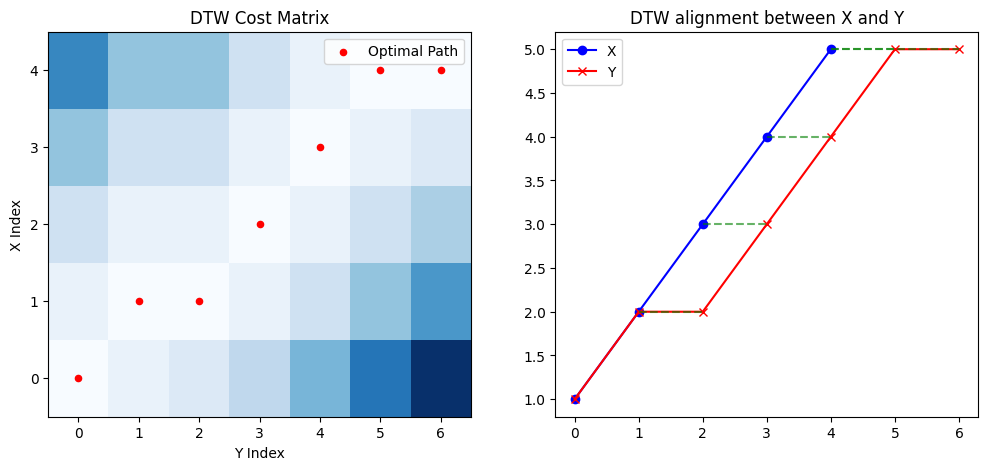

DTW distance for example 2: 7.0
DTW cost matrix for example 2:
 [[ 0. inf inf inf inf inf inf inf inf inf]
 [inf  1.  1.  1.  2.  4.  5.  5.  5.  5.]
 [inf  3.  2.  2.  3.  5.  6.  6.  6.  6.]
 [inf  5.  3.  3.  4.  6.  7.  7.  7.  7.]
 [inf  6.  3.  3.  4.  6.  7.  7.  7.  7.]
 [inf  6.  4.  4.  3.  4.  4.  5.  6.  7.]
 [inf  7.  4.  4.  4.  5.  5.  4.  4.  4.]
 [inf  9.  5.  5.  6.  7.  7.  5.  5.  5.]
 [inf 11.  6.  6.  7.  9.  9.  6.  6.  6.]
 [inf 13.  7.  7.  8. 10. 11.  7.  7.  7.]]
optimal path for example 2: [(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (4, 4), (4, 5), (5, 6), (6, 6), (7, 7), (8, 8)]


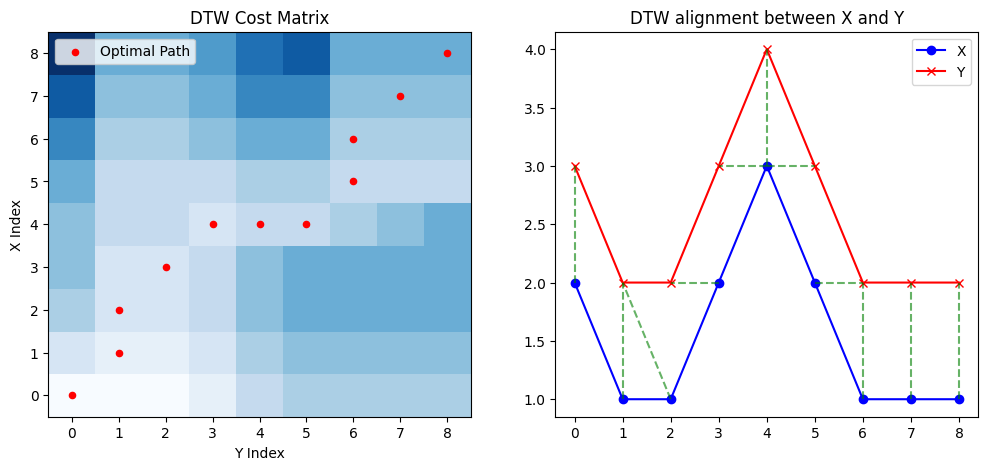

DTW distance for example 3: 2.0
DTW cost matrix for example 3:
 [[ 0.   inf  inf  inf  inf  inf]
 [ inf  0.   0.5  2.   4.5  9. ]
 [ inf  1.   0.5  1.   2.5  6. ]
 [ inf  3.   2.   1.   1.5  4. ]
 [ inf  6.   4.5  2.5  1.5  3. ]
 [ inf 10.   8.   5.   3.   2. ]]
optimal path for example 3: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]


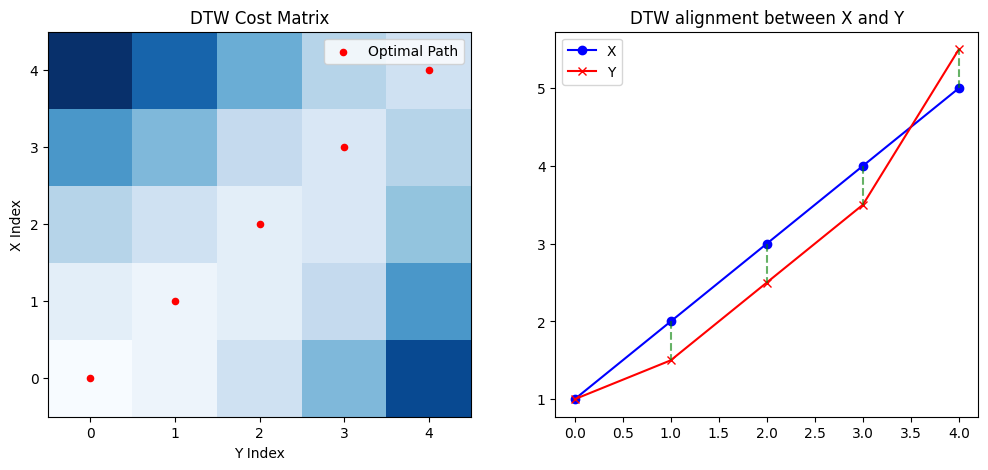

DTW distance for example 4: 0.0
DTW cost matrix for example 4:
 [[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  0.  1.  2.  4.  6.  9. 12. 16. 20.]
 [inf  1.  1.  0.  0.  1.  2.  4.  6.  9. 12.]
 [inf  3.  3.  1.  1.  0.  0.  1.  2.  4.  6.]
 [inf  6.  6.  3.  3.  1.  1.  0.  0.  1.  2.]
 [inf 10. 10.  6.  6.  3.  3.  1.  1.  0.  0.]]
optimal path for example 4: [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9)]


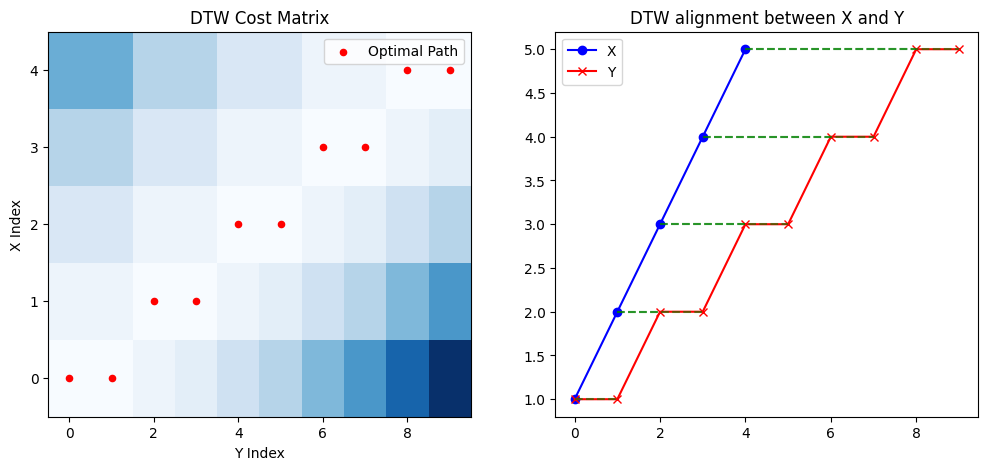

DTW distance for example 5: 135.0
DTW cost matrix for example 5:
 [[  0.  inf  inf  inf  inf  inf]
 [ inf   9.  28.  57.  96. 145.]
 [ inf  17.  27.  55.  93. 141.]
 [ inf  24.  34.  54.  91. 138.]
 [ inf  30.  40.  60.  90. 136.]
 [ inf  35.  45.  65.  95. 135.]]
optimal path for example 5: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]


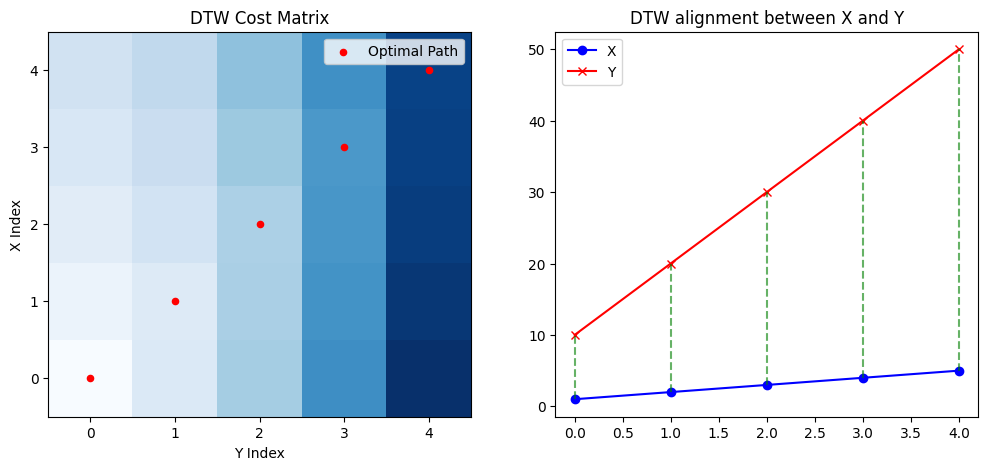

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dtw_distance(X, Y):
    n, m = len(X), len(Y)
    D = np.full((n + 1, m + 1), np.inf)
    D[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(X[i - 1] - Y[j - 1])
            D[i, j] = cost + min(D[i - 1, j], D[i, j - 1], D[i - 1, j - 1])

    return D[n, m], D


def backtrack_dtw(D, X, Y):
    i, j = len(X), len(Y)
    path = [(i - 1, j - 1)]

    while i > 1 or j > 1:
        diag = D[i - 1, j - 1]
        up = D[i - 1, j]
        left = D[i, j - 1]

        if i > 1 and j > 1 and diag <= up and diag <= left:
            i -= 1
            j -= 1
        elif i > 1 and up <= left:
            i -= 1
        else:
            j -= 1

        path.append((i - 1, j - 1))

    path.reverse()
    return path

def plot_dtw_matrix(D, X, Y, path):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].imshow(D[1:, 1:], cmap='Blues', origin='lower', aspect='auto')
    ax[0].set_title("DTW Cost Matrix")
    ax[0].set_xlabel("Y Index")
    ax[0].set_ylabel("X Index")

    path_x, path_y = zip(*path)
    ax[0].scatter(path_y, path_x, color='red', s=20, label="Optimal Path")
    ax[0].legend()

    ax[1].plot(range(len(X)), X, label='X', marker='o', color='blue')
    ax[1].plot(range(len(Y)), Y, label='Y', marker='x', color='red')

    for i, j in path:
        if i >= 0 and j >= 0:
            ax[1].plot([i, j], [X[i], Y[j]], 'g--', alpha=0.6)

    ax[1].legend()
    ax[1].set_title("DTW alignment between X and Y")

    plt.show()

X1 = [1, 2, 3, 4, 5]
Y1 = [1, 2, 2, 3, 4, 5, 5]
X2 = [2, 1, 1, 2, 3, 2, 1, 1, 1]
Y2 = [3, 2, 2, 3, 4, 3, 2, 2, 2]
X3 = [1, 2, 3, 4, 5]
Y3 = [1, 1.5, 2.5, 3.5, 5.5]
X4 = [1, 2, 3, 4, 5]
Y4 = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
X5 = [1, 2, 3, 4, 5]
Y5 = [10, 20, 30, 40, 50]

X_list = [X1, X2, X3, X4, X5]
Y_list = [Y1, Y2, Y3, Y4, Y5]

for i in range(5):
    X = X_list[i]
    Y = Y_list[i]
    dtw_dist, D = dtw_distance(X, Y)
    path = backtrack_dtw(D, X, Y)
    print(f"DTW distance for example {i+1}: {dtw_dist}")
    print(f"DTW cost matrix for example {i+1}:\n", np.round(D, 2))
    print(f"optimal path for example {i+1}: {path}")
    plot_dtw_matrix(D, X, Y, path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

def dtw_distance(X, Y):
    n, m = len(X), len(Y)
    D = np.full((n + 1, m + 1), np.inf)
    D[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(X[i - 1] - Y[j - 1])
            D[i, j] = cost + min(D[i - 1, j], D[i, j - 1], D[i - 1, j - 1])

    return D[n, m]


def generate_random_series(n=10, num_series=10):
    return [np.random.rand(n) for _ in range(num_series)]

def generate_variations(series, num_variations=100):
    scales = np.random.uniform(0.5, 2, num_variations)
    shifts = np.random.uniform(-2, 2, num_variations)
    return [(series * scale) + shift for scale, shift in zip(scales, shifts)]

def compute_dtw_matrix(series_list):
    num_series = len(series_list)
    dtw_matrix = np.zeros((num_series, num_series))

    for i in tqdm(range(num_series)):
        for j in range(i, num_series):
            dtw_dist = dtw_distance(series_list[i], series_list[j])
            dtw_matrix[i, j] = dtw_dist
            dtw_matrix[j, i] = dtw_dist
    return dtw_matrix

num_series = 10
time_series = generate_random_series(n=10, num_series=num_series)

all_variations = []
for series in time_series:
    variations = generate_variations(series, num_variations=100)
    all_variations.extend(variations)

start_time = time.time()

dtw_matrix = compute_dtw_matrix(all_variations)

end_time = time.time()

print("DTW Distance Matrix:\n", np.round(dtw_matrix, 2))
print(f"Computation Time: {end_time - start_time:.2f} seconds")

100%|██████████| 1000/1000 [01:14<00:00, 13.44it/s]

DTW Distance Matrix:
 [[ 0.   20.3  17.71 ... 24.96 26.58 27.11]
 [20.3   0.    2.45 ...  4.8   5.81  6.43]
 [17.71  2.45  0.   ...  7.1   8.43  9.4 ]
 ...
 [24.96  4.8   7.1  ...  0.    1.62  1.97]
 [26.58  5.81  8.43 ...  1.62  0.    1.63]
 [27.11  6.43  9.4  ...  1.97  1.63  0.  ]]
Computation Time: 74.38 seconds


# **ZAD. 2**

In [ ]:
def convert_to_new_mapping(path):
    renumerated_path= [(2*a, 2*b) for a, b in path]
    print(renumerated_path)
    i=0
    while i<len(renumerated_path)-1:
      x1,x2=renumerated_path[i]
      y1,y2=renumerated_path[i+1]
      if (x1==y1 or x2==y2 or (y1==x1+2 and y2==x2+2)):
        renumerated_path.insert(i+1, ((x1+y1)/2, (x2+y2)/2))
      elif (y1==x1+1 and y2==x2+1):
        renumerated_path.insert(i+1, (x1+1, x2)) #or (i+1, x1, x2+1)
      elif(y1==x1+1 and y2==x2+2):
        renumerated_path.insert(i+1, (x1, x2+1)) #. or (i+1, x1+1, y1+1)
      elif (y1==x1+2 and y2==x2+1):
        renumerated_path.insert(i+1, (x1+1, x2)) #or (i+1, x1+1, x2+1)
      i+=2
    return renumerated_path

path = [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9)]
print(path)

mapping = convert_to_new_mapping(path)

print(mapping)


[(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9)]
[(0, 0), (0, 2), (2, 4), (2, 6), (4, 8), (4, 10), (6, 12), (6, 14), (8, 16), (8, 18)]
[(0, 0), (0.0, 1.0), (0, 2), (1.0, 3.0), (2, 4), (2.0, 5.0), (2, 6), (3.0, 7.0), (4, 8), (4.0, 9.0), (4, 10), (5.0, 11.0), (6, 12), (6.0, 13.0), (6, 14), (7.0, 15.0), (8, 16), (8.0, 17.0), (8, 18)]


In [ ]:
import numpy as np
import time

def dtw_distance(X, Y):
    n, m = len(X), len(Y)
    D = np.full((n + 1, m + 1), np.inf)
    D[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(X[i - 1] - Y[j - 1])
            D[i, j] = cost + min(D[i - 1, j], D[i, j - 1], D[i - 1, j - 1])

    return D[n, m], D

def backtrack_dtw(D, X, Y):
    i, j = len(X), len(Y)
    path = [(i - 1, j - 1)]

    while i > 1 or j > 1:
        diag = D[i - 1, j - 1]
        up = D[i - 1, j]
        left = D[i, j - 1]

        if i > 1 and j > 1 and diag <= up and diag <= left:
            i -= 1
            j -= 1
        elif i > 1 and up <= left:
            i -= 1
        else:
            j -= 1

        path.append((i - 1, j - 1))

    path.reverse()
    return path

def ensure_even_length(series):
    if len(series) % 2 == 0:
        series = np.append(series, series[-1])
    return series

def reduce_time_series(series, factor=2):
    series = ensure_even_length(series)
    return series[::factor]

def convert_to_new_mapping(path):
    renumerated_path = [(2 * a, 2 * b) for a, b in path]
    i = 0

    while i < len(renumerated_path) - 1:
        x1, x2 = renumerated_path[i]
        y1, y2 = renumerated_path[i + 1]

        if x1 == y1 or x2 == y2 or (y1 == x1 + 2 and y2 == x2 + 2):
            renumerated_path.insert(i + 1, ((x1 + y1) // 2, (x2 + y2) // 2))
        elif y1 == x1 + 1 and y2 == x2 + 2:
            renumerated_path.insert(i + 1, (x1, x2 + 1))
        else:  # y1 == x1 + 1 and y2 == x2 + 1
            renumerated_path.insert(i + 1, (x1 + 1, x2))

        i += 2

    return renumerated_path

def refine_dtw_path(X, Y, path, iterations=1):
    best_path = path  # .copy()
    best_cost = sum(abs(X[i] - Y[j]) for i, j in best_path)

    for _ in range(iterations):
        improved = False
        new_path = best_path.copy()

        for k in range(1, len(new_path) - 1):
            prev_x, prev_y = new_path[k - 1]
            i, j = new_path[k]
            next_x, next_y = new_path[k + 1]

            candidate = None

            if next_x == prev_x + 1 and next_y == prev_y + 1:
                candidate = (i + 1, j - 1) if j == next_y and i + 1 < len(X) else (i - 1, j + 1)
            elif next_x == prev_x + 1 and next_y == prev_y + 2:
                candidate = (i - 1, j) if j == next_x and i - 1 >= 0 else (i + 1, j)
            elif next_x == prev_x + 2 and next_y == prev_y + 1:
                candidate = (i, j - 1) if j == next_y and j - 1 >= 0 else (i + 1, j + 1)

            if candidate and 0 <= candidate[0] < len(X) and 0 <= candidate[1] < len(Y):
                new_path[k] = candidate
                improved = True

                cost = sum(abs(X[a] - Y[b]) for a, b in new_path)
                if cost < best_cost:
                    best_path = new_path  # .copy()
                    best_cost = cost

    return best_path, best_cost

def refined_dtw_distance(X, Y, factor=2):
    X = ensure_even_length(X)
    Y = ensure_even_length(Y)

    X_reduced = reduce_time_series(X, factor)
    Y_reduced = reduce_time_series(Y, factor)

    dtw_dist_reduced, D_reduced = dtw_distance(X_reduced, Y_reduced)

    reduced_path = backtrack_dtw(D_reduced, X_reduced, Y_reduced)
    full_path = convert_to_new_mapping(reduced_path)

    dtw_dist_transferred = sum(abs(X[i] - Y[j]) for i, j in full_path if i < len(X) and j < len(Y))

    refined_path, refined_cost = refine_dtw_path(X, Y, full_path)

    return dtw_dist_reduced, dtw_dist_transferred, refined_cost

def compare_dtw_procedures(time_series_1, time_series_2):
    time_series_1 = ensure_even_length(time_series_1)
    time_series_2 = ensure_even_length(time_series_2)

    # Original DTW
    start_time = time.time()
    original_dtw_dist, D = dtw_distance(time_series_1, time_series_2)
    original_dtw_time = time.time() - start_time

    # Refined DTW
    start_time = time.time()
    dtw_dist_reduced, dtw_dist_transferred, dtw_dist_refined = refined_dtw_distance(time_series_1, time_series_2)
    refined_dtw_time = time.time() - start_time

    return original_dtw_dist, original_dtw_time, dtw_dist_reduced, dtw_dist_transferred, dtw_dist_refined, refined_dtw_time


In [ ]:
time_series_1 = np.cos(np.linspace(0, 5, 121))
time_series_2 = np.sin(np.linspace(0, 5, 301) + 0.1)

results = compare_dtw_procedures(time_series_1, time_series_2)
print("\nTest Case 1:")
print(f"Original DTW Distance: {results[0]:.4f}, Time: {results[1]:.4f} seconds")
print(f"Reduced DTW Distance: {results[2]:.4f}")
print(f"Transferred DTW Distance: {results[3]:.4f}")
print(f"Refined DTW Distance: {results[4]:.4f}, Time: {results[5]:.4f} seconds\n")

time_series_3 = np.sin(np.linspace(0, 5, 500))
time_series_4 = np.sin(np.linspace(0, 5, 500))

results = compare_dtw_procedures(time_series_3, time_series_4)
print("Test Case 2:")
print(f"Original DTW Distance: {results[0]:.4f}, Time: {results[1]:.4f} seconds")
print(f"Reduced DTW Distance: {results[2]:.4f}")
print(f"Transferred DTW Distance: {results[3]:.4f}")
print(f"Refined DTW Distance: {results[4]:.4f}, Time: {results[5]:.4f} seconds\n")

time_series_5 = np.sin(np.linspace(0, 5, 1000))
time_series_6 = np.sin(np.linspace(0, 5, 900))

results = compare_dtw_procedures(time_series_5, time_series_6)
print("Test Case 3:")
print(f"Original DTW Distance: {results[0]:.4f}, Time: {results[1]:.4f} seconds")
print(f"Reduced DTW Distance: {results[2]:.4f}")
print(f"Transferred DTW Distance: {results[3]:.4f}")
print(f"Refined DTW Distance: {results[4]:.4f}, Time: {results[5]:.4f} seconds\n")

time_series_5 = np.sin(np.linspace(0, 5, 120))
time_series_6 = np.cos(np.linspace(0, 5, 150))

results = compare_dtw_procedures(time_series_5, time_series_6)
print("Test Case 4:")
print(f"Original DTW Distance: {results[0]:.4f}, Time: {results[1]:.4f} seconds")
print(f"Reduced DTW Distance: {results[2]:.4f}")
print(f"Transferred DTW Distance: {results[3]:.4f}")
print(f"Refined DTW Distance: {results[4]:.4f}, Time: {results[5]:.4f} seconds\n")


Test Case 1:
Original DTW Distance: 46.9129, Time: 0.1436 seconds
Reduced DTW Distance: 24.5843
Transferred DTW Distance: 47.5159
Refined DTW Distance: 47.5143, Time: 0.1260 seconds

Test Case 2:
Original DTW Distance: 0.0000, Time: 2.8960 seconds
Reduced DTW Distance: 0.0000
Transferred DTW Distance: 0.0000
Refined DTW Distance: 0.0000, Time: 0.5456 seconds

Test Case 3:
Original DTW Distance: 0.8448, Time: 7.7135 seconds
Reduced DTW Distance: 0.8449
Transferred DTW Distance: 1.5387
Refined DTW Distance: 1.5354, Time: 1.6366 seconds

Test Case 4:
Original DTW Distance: 40.4996, Time: 0.0531 seconds
Reduced DTW Distance: 21.1126
Transferred DTW Distance: 40.9348
Refined DTW Distance: 40.9135, Time: 0.0454 seconds



In [ ]:
import numpy as np
import time

def generate_random_series(length, num_series):
    return [np.random.rand(length) for _ in range(num_series)]

def benchmark_dtw(num_series=100, series_length=200):
    series_list_1 = generate_random_series(series_length, num_series)
    series_list_2 = generate_random_series(series_length, num_series)

    original_times = []
    refined_times = []

    for X, Y in zip(series_list_1, series_list_2):
        start_time = time.time()
        dtw_distance(X, Y)
        original_times.append(time.time() - start_time)

        start_time = time.time()
        refined_dtw_distance(X, Y)
        refined_times.append(time.time() - start_time)

    avg_original_time = np.mean(original_times)
    avg_refined_time = np.mean(refined_times)

    print(f"Średni czas klasycznego DTW: {avg_original_time:.6f} s")
    print(f"Średni czas przyspieszonego DTW: {avg_refined_time:.6f} s")
    print(f"Przyspieszenie: {avg_original_time / avg_refined_time:.2f}x")

benchmark_dtw(num_series=100, series_length=1000)


Średni czas klasycznego DTW: 1.456433 s
Średni czas przyspieszonego DTW: 0.964765 s
Przyspieszenie: 1.51x



reduced path:
  (0, 0)
  (0, 1)
  (0, 2)
  (1, 3)
  (2, 4)
  (3, 5)
  (4, 5)
  (5, 6)

renumerated path:
  (0, 0)
  (0, 1)
  (0, 2)
  (0, 3)
  (0, 4)
  (1, 5)
  (2, 6)
  (3, 7)
  (4, 8)
  (5, 9)
  (6, 10)
  (7, 10)
  (8, 10)
  (9, 11)
  (10, 12)

refined path:
  (0, 0)
  (0, 1)
  (0, 2)
  (0, 3)
  (0, 4)
  (1, 5)
  (2, 6)
  (3, 7)
  (4, 8)
  (5, 9)
  (6, 10)
  (7, 10)
  (8, 10)
  (9, 11)
  (10, 12)

differences in renumerated path:
  moved point: (1, 1)
  moved point: (1, 2)
  moved point: (1, 3)
  moved point: (1, 4)
  moved point: (6, 11)
  moved point: (7, 12)
  moved point: (8, 12)
  moved point: (9, 12)

no differences found in refined path.


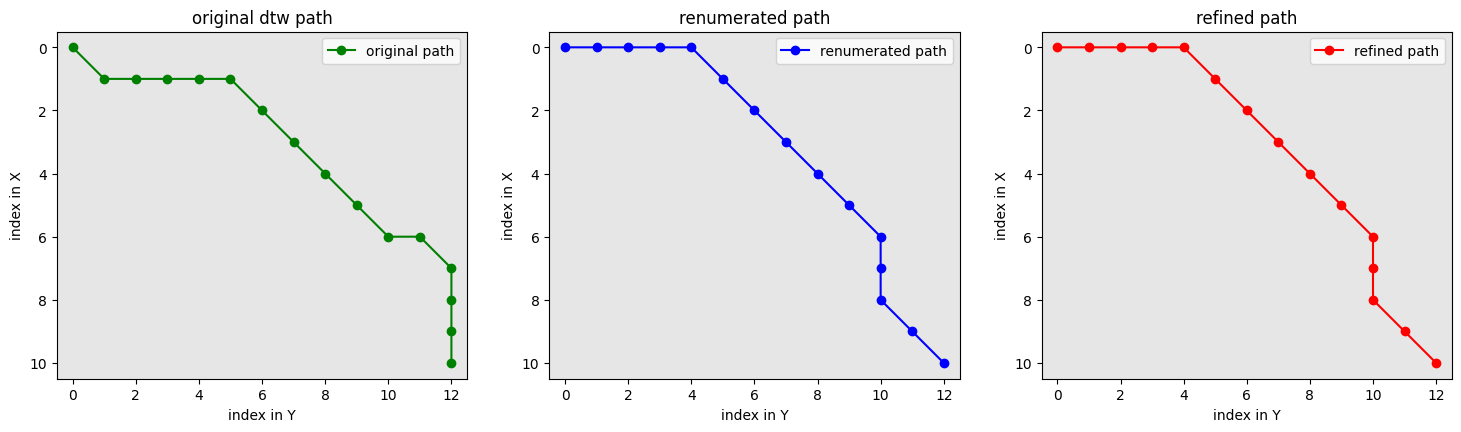

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def find_differences(path1, path2):
    differences = [(i, j) for (i, j) in path1 if (i, j) not in path2]
    return differences

def print_differences(name, original, modified):
    differences = find_differences(original, modified)
    if differences:
        print(f"\ndifferences in {name}:")
        for diff in differences[:10]:
            print(f"  moved point: {diff}")
    else:
        print(f"\nno differences found in {name}.")

def print_path(name, path):
    print(f"\n{name} path:")
    for i, j in path:
        print(f"  ({i}, {j})")

def plot_dtw_paths(original_path, renumerated_path, refined_path, X, Y):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].imshow(np.zeros((len(X), len(Y))), cmap='gray', alpha=0.1)
    orig_x, orig_y = zip(*original_path)
    ax[0].plot(orig_y, orig_x, marker='o', linestyle='-', color='green', label="original path")
    ax[0].set_title("original dtw path")
    ax[0].set_xlabel("index in Y")
    ax[0].set_ylabel("index in X")

    ax[1].imshow(np.zeros((len(X), len(Y))), cmap='gray', alpha=0.1)
    renum_x, renum_y = zip(*renumerated_path)
    ax[1].plot(renum_y, renum_x, marker='o', linestyle='-', color='blue', label="renumerated path")
    ax[1].set_title("renumerated path")
    ax[1].set_xlabel("index in Y")
    ax[1].set_ylabel("index in X")

    ax[2].imshow(np.zeros((len(X), len(Y))), cmap='gray', alpha=0.1)
    ref_x, ref_y = zip(*refined_path)
    ax[2].plot(ref_y, ref_x, marker='o', linestyle='-', color='red', label="refined path")
    ax[2].set_title("refined path")
    ax[2].set_xlabel("index in Y")
    ax[2].set_ylabel("index in X")

    for i in range(3):
        ax[i].legend()

    plt.show()

time_series_1 = np.cos(np.linspace(0, 5, 11))
time_series_2 = np.sin(np.linspace(0, 5, 13) + 0.1)

_, D = dtw_distance(time_series_1, time_series_2)
original_path = backtrack_dtw(D, time_series_1, time_series_2)

X_reduced = reduce_time_series(time_series_1, 2)
Y_reduced = reduce_time_series(time_series_2, 2)
_, D_reduced = dtw_distance(X_reduced, Y_reduced)
reduced_path = backtrack_dtw(D_reduced, X_reduced, Y_reduced)
renumerated_path = convert_to_new_mapping(reduced_path)
refined_path, _ = refine_dtw_path(time_series_1, time_series_2, renumerated_path)

print_path("reduced", reduced_path)
print_path("renumerated", renumerated_path)
print_path("refined", refined_path)

print_differences("renumerated path", original_path, renumerated_path)
print_differences("refined path", renumerated_path, refined_path)

plot_dtw_paths(original_path, renumerated_path, refined_path, time_series_1, time_series_2)


Original Path: [(0, 0), (1, 0), (1, 2), (7, 7)]
Filled Path: [(0, 0), (1, 0), (1, 0), (1, 1), (1, 2), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 7), (7, 7)]


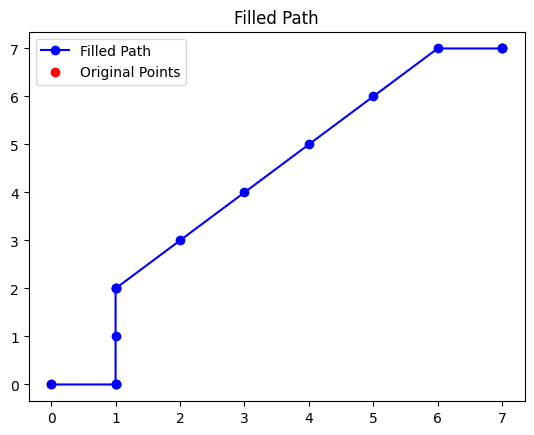

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fill_gaps(path):
    filled_path = [path[0]]

    for i in range(1, len(path)):
        prev_x, prev_y = filled_path[-1]
        curr_x, curr_y = path[i]

        while prev_x < curr_x and prev_y < curr_y:
            prev_x += 1
            prev_y += 1
            filled_path.append((prev_x, prev_y))

        while prev_x < curr_x:
            prev_x += 1
            filled_path.append((prev_x, prev_y))

        while prev_y < curr_y:
            prev_y += 1
            filled_path.append((prev_x, prev_y))

        filled_path.append((curr_x, curr_y))

    return filled_path

path = [(0, 0), (1, 0),(1,2), (7,7)]

filled_path = fill_gaps(path)

print("Original Path:", path)
print("Filled Path:", filled_path)

x_vals, y_vals = zip(*filled_path)
plt.plot(x_vals, y_vals, marker='o', color='b', label='Filled Path')

orig_x, orig_y = zip(*path)
plt.scatter(orig_x, orig_y, color='r', label='Original Points')

plt.title('Filled Path')
plt.legend()
plt.show()


##ZAD. 3

(84, 144) (84,)


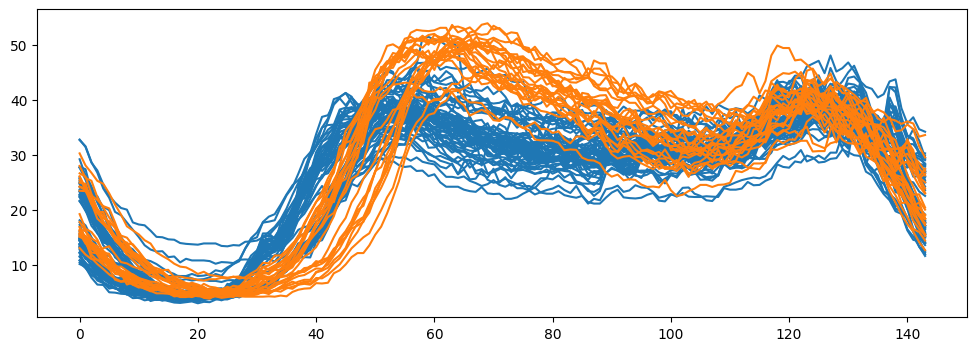

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()


In [ ]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54, 144) (54,)
(30, 144) (30,)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.004066944122314453


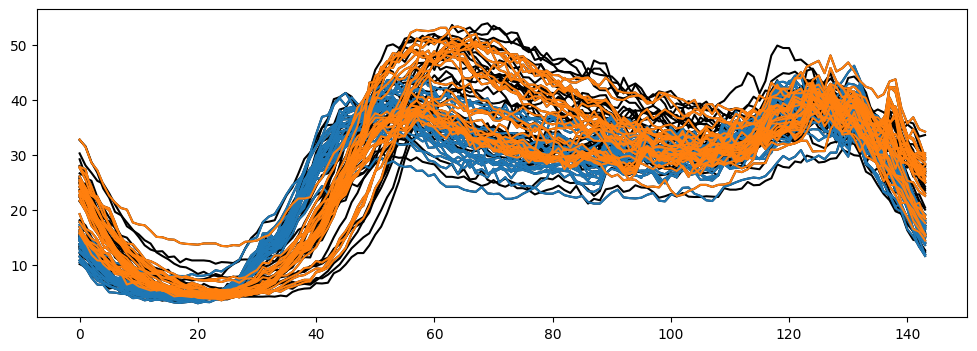

In [ ]:
labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

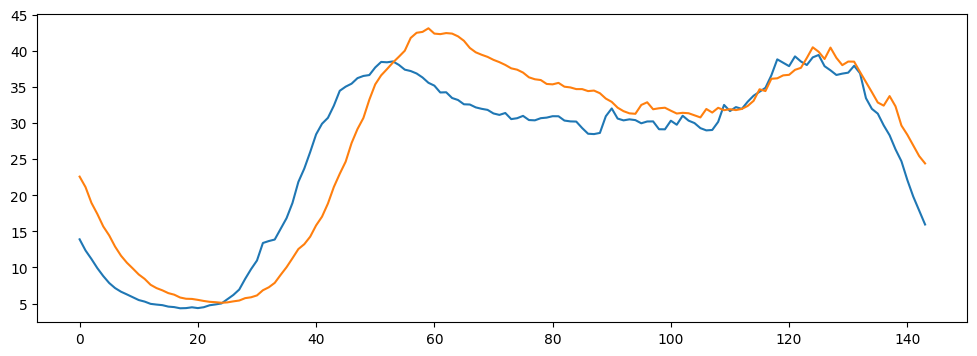

In [ ]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

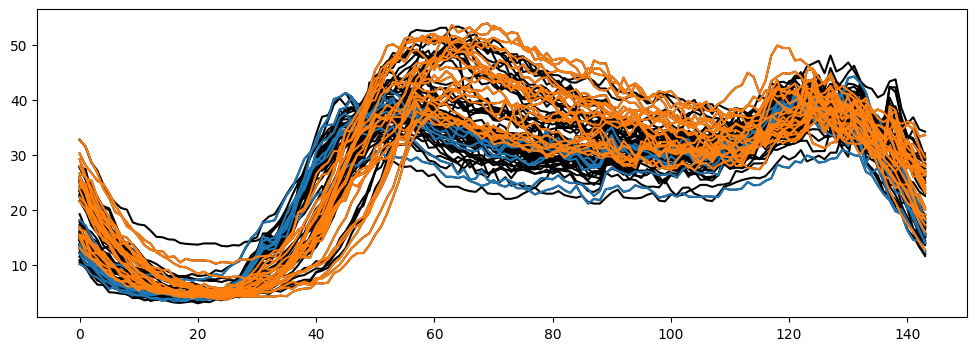

In [ ]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [ ]:
confusion_matrix(labels, y_test)

array([[ 7,  0],
       [11, 12]])

In [ ]:
pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

t = time.time()

# tskmeans = TimeSeriesKMeans(n_clusters=2, metric='euclidean', n_init=5)
tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
# tskmeans = TimeSeriesKMeans(n_clusters=2, metric='softdtw', metric_params={"gamma": .01}, n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


38.01122450828552


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 30 1-dimensional timeseries
  warnings.warn(


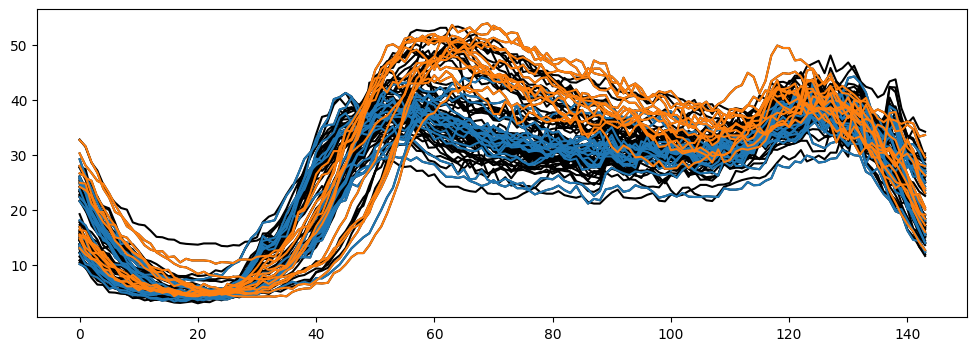

In [ ]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [ ]:
confusion_matrix(labels, y_test)

array([[15,  2],
       [ 3, 10]])

(651, 144) (651,)


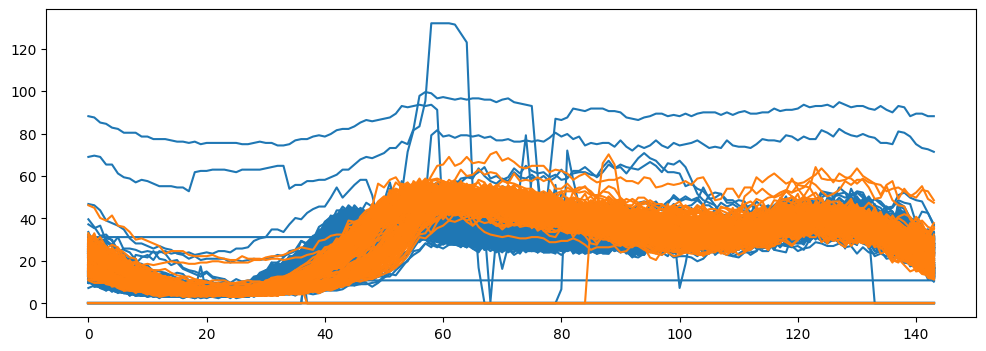

(423, 144) (423,)
(228, 144) (228,)
KMeans fitting time: 0.007962465286254883
KMeans Confusion Matrix:
[[154  12]
 [  7  55]]


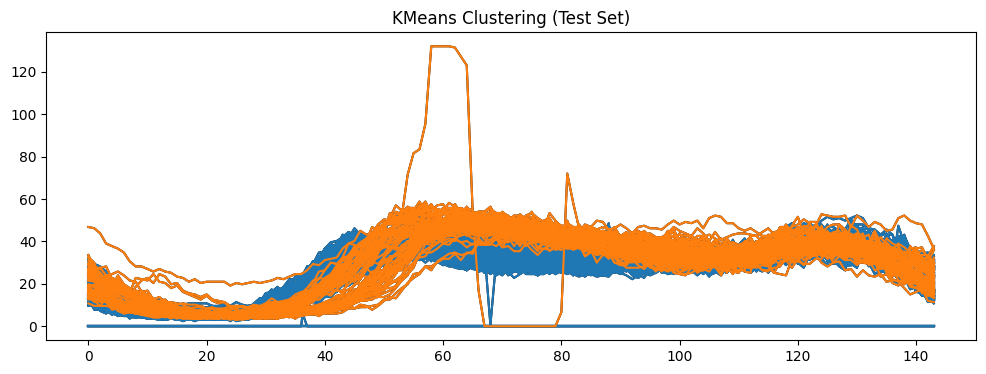

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TimeSeriesKMeans fitting time: 261.1099054813385
TimeSeriesKMeans Confusion Matrix:
[[162   4]
 [ 60   2]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 228 1-dimensional timeseries
  warnings.warn(


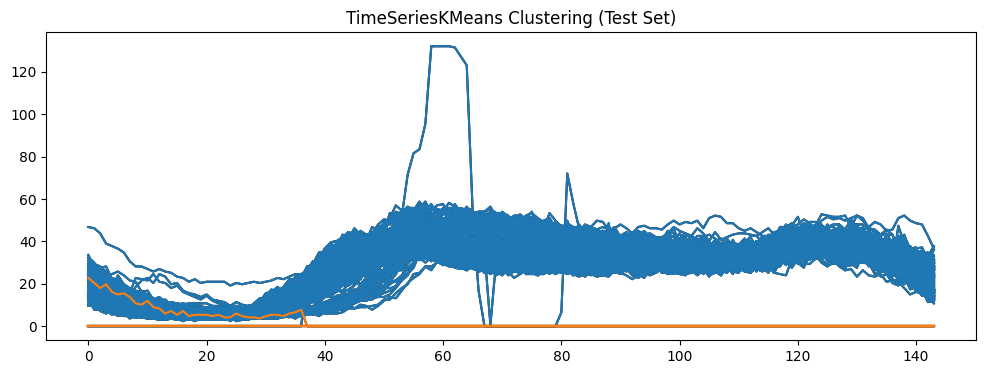

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index('date')


y = df.index.weekday.map(lambda x: 0 if x < 5 else 1).values
X = df.values
N=len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


t = time.time()
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
print("KMeans fitting time:", time.time() - t)

labels_kmeans = kmeans.predict(X_test)
cm_kmeans = confusion_matrix(y_test, labels_kmeans)
print("KMeans Confusion Matrix:")
print(cm_kmeans)

plt.figure(figsize=(12, 4))
plt.plot(X_test.T, 'k')
plt.plot(X_test[labels_kmeans == 0, :].T, '#1F77B4')
plt.plot(X_test[labels_kmeans == 1, :].T, '#FF7F0E')
plt.title("KMeans Clustering (Test Set)")
plt.show()

t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(X_train)
print("TimeSeriesKMeans fitting time:", time.time() - t)

labels_tskmeans = tskmeans.predict(X_test)
cm_tskmeans = confusion_matrix(y_test, labels_tskmeans)
print("TimeSeriesKMeans Confusion Matrix:")
print(cm_tskmeans)

plt.figure(figsize=(12, 4))
plt.plot(X_test.T, 'k')
plt.plot(X_test[labels_tskmeans == 0, :].T, '#1F77B4')
plt.plot(X_test[labels_tskmeans == 1, :].T, '#FF7F0E')
plt.title("TimeSeriesKMeans Clustering (Test Set)")
plt.show()


KMeans fitting time: 0.022592782974243164
KMeans Confusion Matrix:
[[26 69]
 [23 13]]


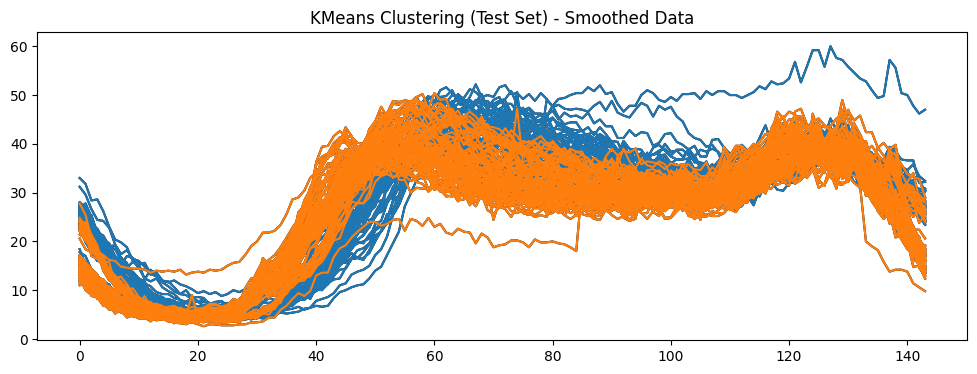

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TimeSeriesKMeans fitting time: 321.1778631210327
TimeSeriesKMeans Confusion Matrix:
[[95  0]
 [36  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 131 1-dimensional timeseries
  warnings.warn(


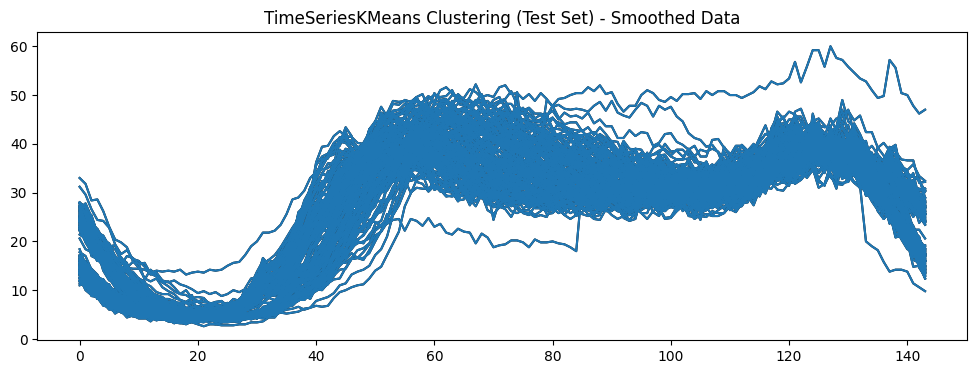

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index('date')

window_size = 3
df_smooth = df.rolling(window=window_size, min_periods=1).mean()

y = df_smooth.index.weekday.map(lambda x: 0 if x < 5 else 1).values
X = df_smooth.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

t = time.time()
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
print("KMeans fitting time:", time.time() - t)

labels_kmeans = kmeans.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
cm_kmeans = confusion_matrix(y_test, labels_kmeans)
print("KMeans Confusion Matrix:")
print(cm_kmeans)

plt.figure(figsize=(12, 4))
plt.plot(X_test.T, 'k')
plt.plot(X_test[labels_kmeans == 0, :].T, '#1F77B4')
plt.plot(X_test[labels_kmeans == 1, :].T, '#FF7F0E')
plt.title("KMeans Clustering (Test Set) - Smoothed Data")
plt.show()

t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(X_train_scaled)
print("TimeSeriesKMeans fitting time:", time.time() - t)

labels_tskmeans = tskmeans.predict(X_test_scaled)

cm_tskmeans = confusion_matrix(y_test, labels_tskmeans)
print("TimeSeriesKMeans Confusion Matrix:")
print(cm_tskmeans)

plt.figure(figsize=(12, 4))
plt.plot(X_test.T, 'k')
plt.plot(X_test[labels_tskmeans == 0, :].T, '#1F77B4')
plt.plot(X_test[labels_tskmeans == 1, :].T, '#FF7F0E')
plt.title("TimeSeriesKMeans Clustering (Test Set) - Smoothed Data")
plt.show()
'''
DTW works well when time series have distinct peaks, valleys, and fluctuations because it finds the best alignment.
A moving average smooths out fluctuations, reducing key variations in the time series.
DTW then struggles to find meaningful warping paths because the shape information is lost.
'''

Train data shape: (36, 252)
Test data shape: (175, 252)


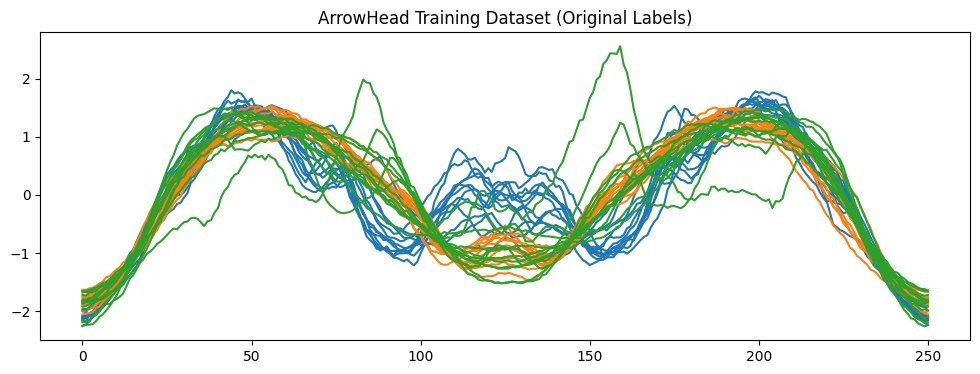

KMeans fitting time: 0.008725881576538086
KMeans Confusion Matrix:
[[32 36  1]
 [ 0 53  0]
 [ 1 50  2]]


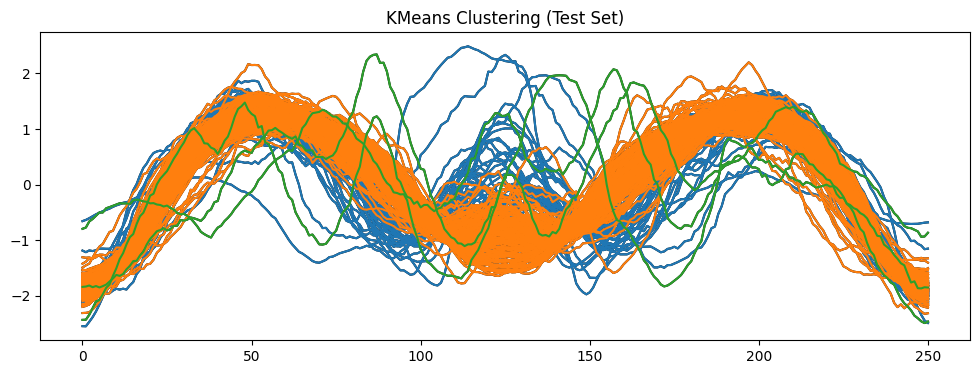

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TimeSeriesKMeans fitting time: 30.23903179168701


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TimeSeriesKMeans Confusion Matrix:
[[ 2 26 41]
 [19  3 31]
 [39  2 12]]


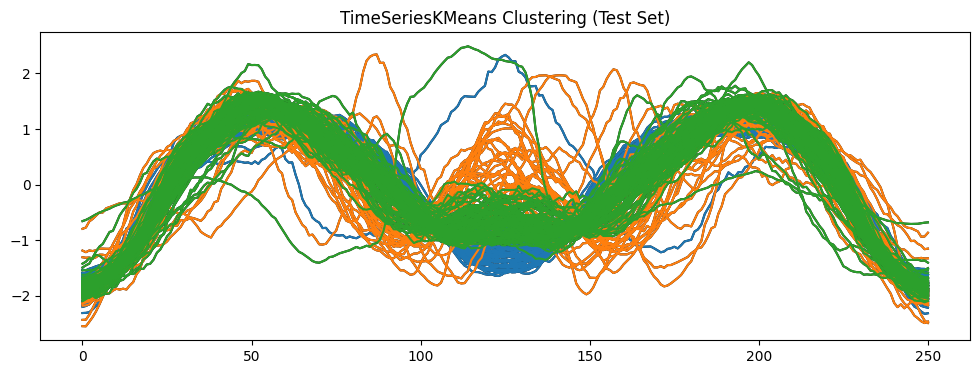

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import time
from sklearn.metrics import confusion_matrix

train_data = np.loadtxt('ArrowHead_TRAIN.txt')
test_data = np.loadtxt('ArrowHead_TEST.txt')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

y_train = train_data[:, 0]
y_test = test_data[:, 0]

X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

plt.figure(figsize=(12, 4))
unique_classes = np.unique(y_train)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C']

for i, cls in enumerate(unique_classes):
    plt.plot(X_train[y_train == cls].T, color=colors[i], label=f'Class {cls}')
plt.title("ArrowHead Training Dataset (Original Labels)")
plt.show()

t = time.time()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
print("KMeans fitting time:", time.time() - t)

labels_kmeans = kmeans.predict(X_test)

conf_matrix_kmeans = confusion_matrix(y_test, labels_kmeans)
print("KMeans Confusion Matrix:")
print(conf_matrix_kmeans)

# Plot KMeans clustering results
plt.figure(figsize=(12, 4))
plt.plot(X_test.T, 'k')
plt.plot(X_test[labels_kmeans == 0, :].T, '#1F77B4')
plt.plot(X_test[labels_kmeans == 1, :].T, '#FF7F0E')
plt.plot(X_test[labels_kmeans == 2, :].T, '#2CA02C')
plt.title("KMeans Clustering (Test Set)")
plt.show()

t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter_barycenter=100, n_init=5)
tskmeans.fit(to_time_series_dataset(X_train))
print("TimeSeriesKMeans fitting time:", time.time() - t)

labels_tskmeans = tskmeans.predict(to_time_series_dataset(X_test))

conf_matrix_tskmeans = confusion_matrix(y_test, labels_tskmeans)
print("TimeSeriesKMeans Confusion Matrix:")
print(conf_matrix_tskmeans)

# Plot TimeSeriesKMeans clustering results
plt.figure(figsize=(12, 4))
plt.plot(X_test.T, 'k')
plt.plot(X_test[labels_tskmeans == 0, :].T, '#1F77B4')
plt.plot(X_test[labels_tskmeans == 1, :].T, '#FF7F0E')
plt.plot(X_test[labels_tskmeans == 2, :].T, '#2CA02C')
plt.title("TimeSeriesKMeans Clustering (Test Set)")
plt.show()


Shape of X_train: (40, 600)
Shape of X_test: (40, 600)
Shape of y_train_encoded: (40,)
Shape of y_test_encoded: (40,)
KMeans fitting time: 0.00946807861328125


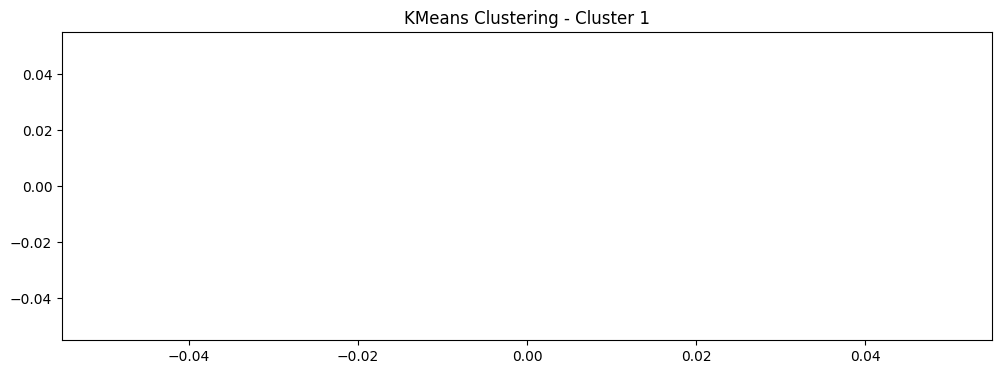

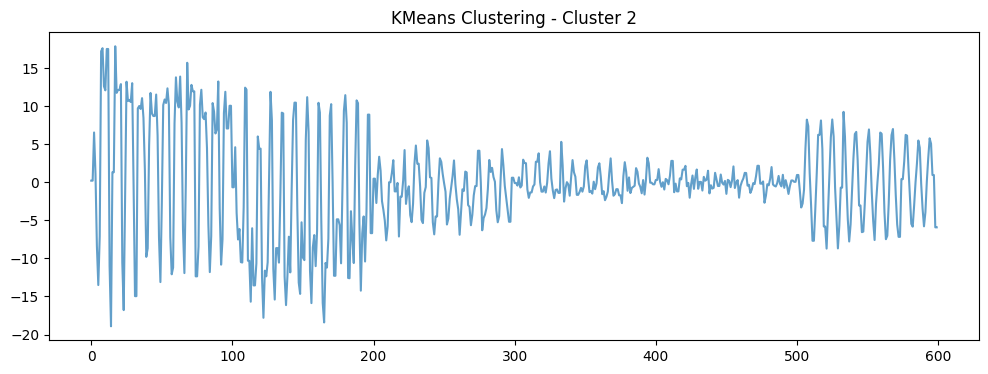

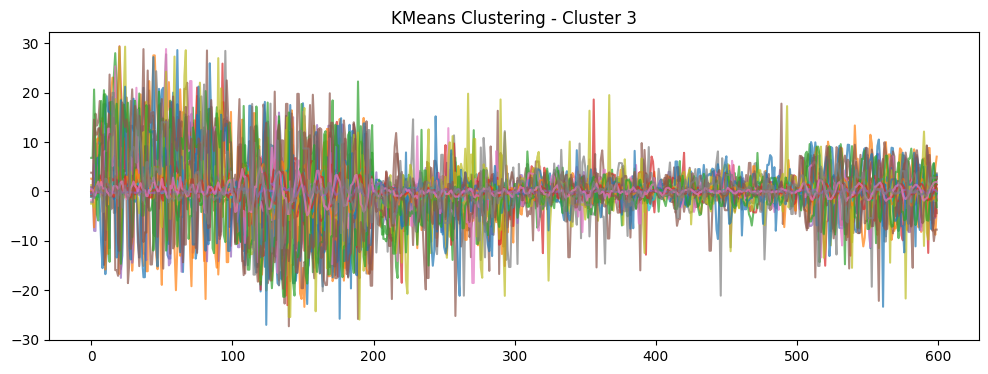

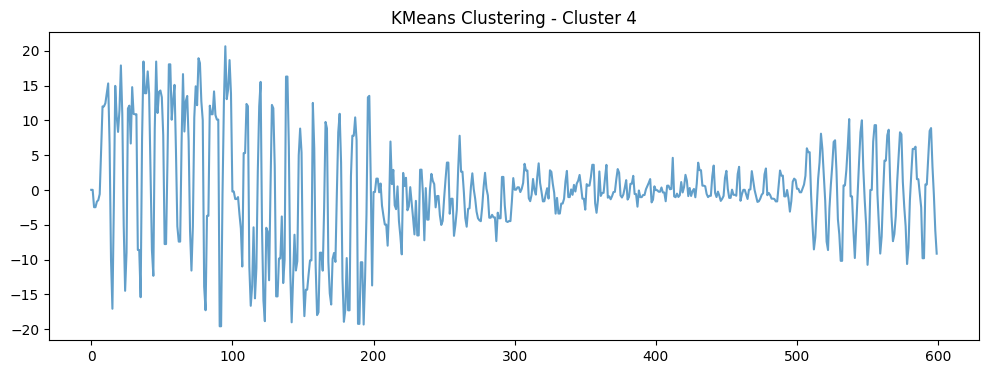

KMeans Confusion Matrix:
[[ 0  0 10  0]
 [ 0  1  8  1]
 [ 0  0 10  0]
 [ 0  0 10  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TimeSeriesKMeans fitting time: 71.8689832687378


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


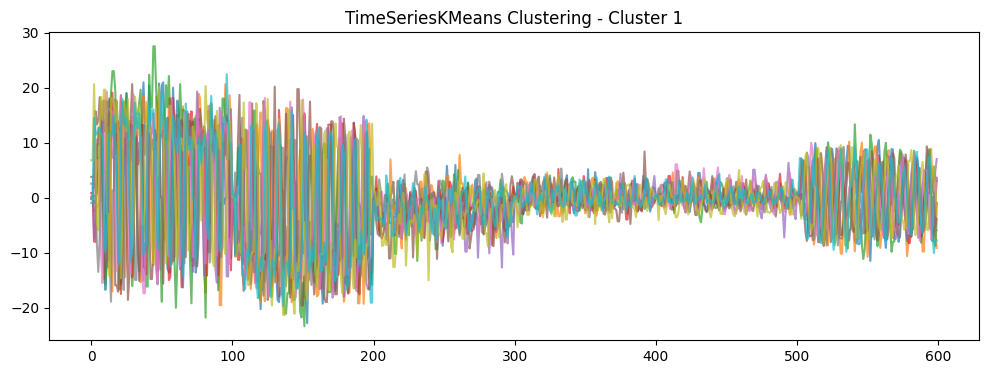

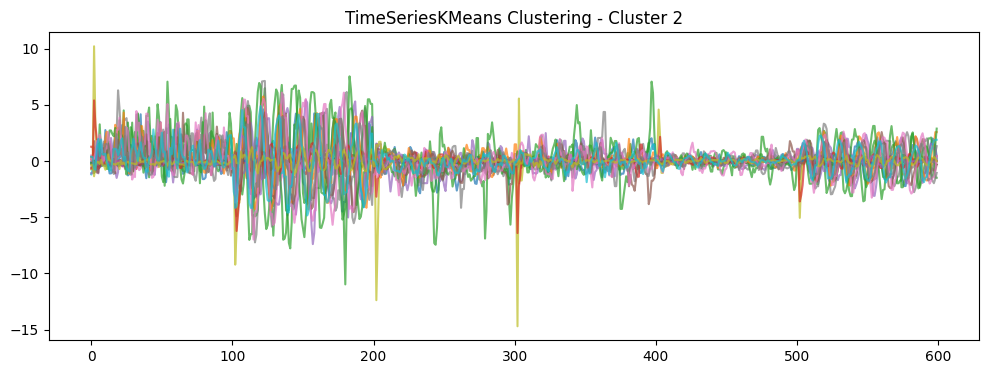

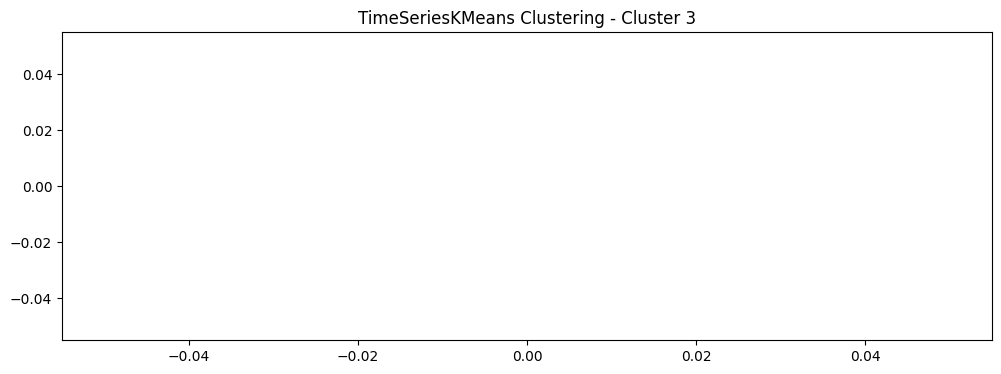

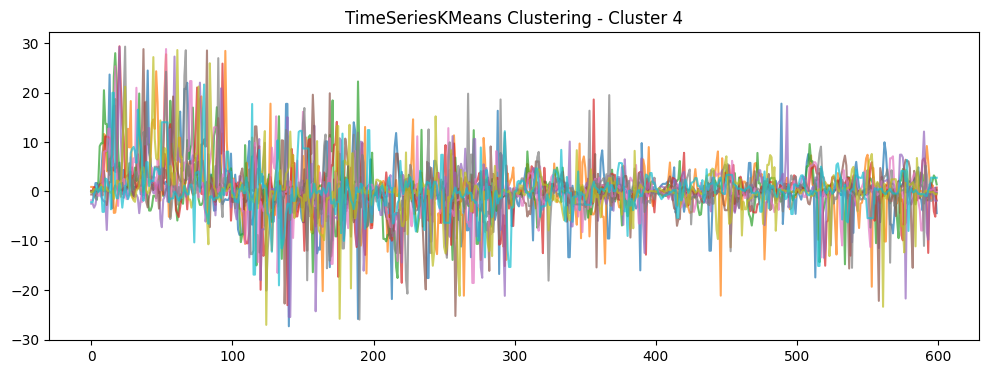

TimeSeriesKMeans Confusion Matrix:
[[ 0  0  0 10]
 [10  0  0  0]
 [ 0 10  0  0]
 [ 0 10  0  0]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import time
from scipy.io import arff

train_files = [
    'BasicMotionsDimension1_TRAIN.arff',
    'BasicMotionsDimension2_TRAIN.arff',
    'BasicMotionsDimension3_TRAIN.arff',
    'BasicMotionsDimension4_TRAIN.arff',
    'BasicMotionsDimension5_TRAIN.arff',
    'BasicMotionsDimension6_TRAIN.arff'
]

test_files = [
    'BasicMotionsDimension1_TEST.arff',
    'BasicMotionsDimension2_TEST.arff',
    'BasicMotionsDimension3_TEST.arff',
    'BasicMotionsDimension4_TEST.arff',
    'BasicMotionsDimension5_TEST.arff',
    'BasicMotionsDimension6_TEST.arff'
]

def load_arff_file(file_name):
    data, meta = arff.loadarff(file_name)
    return pd.DataFrame(data)

train_data = [load_arff_file(f) for f in train_files]
test_data = [load_arff_file(f) for f in test_files]

y_train = train_data[0].iloc[:, -1].values
y_test = test_data[0].iloc[:, -1].values

y_train = [label.decode('utf-8') for label in y_train]
y_test = [label.decode('utf-8') for label in y_test]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train = pd.concat([df.iloc[:, :-1] for df in train_data], axis=1)
X_test = pd.concat([df.iloc[:, :-1] for df in test_data], axis=1)

X_train = X_train.values
X_test = X_test.values

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

X_train, y_train_encoded = shuffle(X_train, y_train_encoded, random_state=42)
X_test, y_test_encoded = shuffle(X_test, y_test_encoded, random_state=42)

t = time.time()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
print("KMeans fitting time:", time.time() - t)

labels_kmeans = kmeans.predict(X_test)

for i in range(4):
    plt.figure(figsize=(12, 4))
    plt.plot(X_test[labels_kmeans == i, :].T, alpha=0.7)
    plt.title(f"KMeans Clustering - Cluster {i+1}")
    plt.show()

conf_matrix_kmeans = confusion_matrix(y_test_encoded, labels_kmeans)
print("KMeans Confusion Matrix:")
print(conf_matrix_kmeans)

t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter_barycenter=100, n_init=5)
tskmeans.fit(to_time_series_dataset(X_train))
print("TimeSeriesKMeans fitting time:", time.time() - t)

labels_tskmeans = tskmeans.predict(to_time_series_dataset(X_test))

for i in range(4):
    plt.figure(figsize=(12, 4))
    plt.plot(X_test[labels_tskmeans == i, :].T, alpha=0.7)
    plt.title(f"TimeSeriesKMeans Clustering - Cluster {i+1}")
    plt.show()

conf_matrix_tskmeans = confusion_matrix(y_test_encoded, labels_tskmeans)
print("TimeSeriesKMeans Confusion Matrix:")
print(conf_matrix_tskmeans)


# ZAD. 4


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

def load_arff_file(file_name):
    data, meta = arff.loadarff(file_name)
    return pd.DataFrame(data)

def extract_features_from_window(window):
    mean = np.mean(window)
    std_dev = np.std(window)
    slope, _, _, _, _ = linregress(np.arange(len(window)), window)
    return [mean, std_dev, slope]

def extract_features(X, window_size=50, step_size=25):
    features = []
    for time_series in X:
        series_features = []
        for start in range(0, len(time_series) - window_size, step_size):
            window = time_series[start:start + window_size]
            series_features.extend(extract_features_from_window(window))
        features.append(series_features)
    return np.array(features)

train_files = [
    'BasicMotionsDimension1_TRAIN.arff',
    'BasicMotionsDimension2_TRAIN.arff',
    'BasicMotionsDimension3_TRAIN.arff',
    'BasicMotionsDimension4_TRAIN.arff',
    'BasicMotionsDimension5_TRAIN.arff',
    'BasicMotionsDimension6_TRAIN.arff'
]

test_files = [
    'BasicMotionsDimension1_TEST.arff',
    'BasicMotionsDimension2_TEST.arff',
    'BasicMotionsDimension3_TEST.arff',
    'BasicMotionsDimension4_TEST.arff',
    'BasicMotionsDimension5_TEST.arff',
    'BasicMotionsDimension6_TEST.arff'
]

train_data = [load_arff_file(f) for f in train_files]
test_data = [load_arff_file(f) for f in test_files]

y_train = train_data[0].iloc[:, -1].values
y_test = test_data[0].iloc[:, -1].values
y_train = [label.decode('utf-8') for label in y_train]
y_test = [label.decode('utf-8') for label in y_test]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train = pd.concat([df.iloc[:, :-1] for df in train_data], axis=1).values
X_test = pd.concat([df.iloc[:, :-1] for df in test_data], axis=1).values

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

window_size = 50
step_size = 25

X_train_features = extract_features(X_train, window_size=window_size, step_size=step_size)
X_test_features = extract_features(X_test, window_size=window_size, step_size=step_size)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train_encoded)

y_pred_rf = rf_classifier.predict(X_test_features)

conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

accuracy_rf = np.sum(y_pred_rf == y_test_encoded) / len(y_test_encoded)
print(f"Random Forest Classification Accuracy: {accuracy_rf:.4f}")


Shape of X_train: (40, 600)
Shape of X_test: (40, 600)
Shape of y_train_encoded: (40,)
Shape of y_test_encoded: (40,)
Random Forest Confusion Matrix:
[[10  0  0  0]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]
Random Forest Classification Accuracy: 1.0000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress
from scipy.io import arff
from sktime.classification.interval_based import TimeSeriesForestClassifier

def load_arff_file(file_name):
    data, meta = arff.loadarff(file_name)
    return pd.DataFrame(data)

def extract_features_from_window(window):
    mean = np.mean(window)
    std_dev = np.std(window)
    slope, _, _, _, _ = linregress(np.arange(len(window)), window)
    return [mean, std_dev, slope]

def extract_features(X, window_size=50, step_size=25):
    features = []
    for time_series in X:
        series_features = []
        for start in range(0, len(time_series) - window_size, step_size):
            window = time_series[start:start + window_size]
            series_features.extend(extract_features_from_window(window))
        features.append(series_features)
    return np.array(features)

train_files = [
    'BasicMotionsDimension1_TRAIN.arff',
    'BasicMotionsDimension2_TRAIN.arff',
    'BasicMotionsDimension3_TRAIN.arff',
    'BasicMotionsDimension4_TRAIN.arff',
    'BasicMotionsDimension5_TRAIN.arff',
    'BasicMotionsDimension6_TRAIN.arff'
]

test_files = [
    'BasicMotionsDimension1_TEST.arff',
    'BasicMotionsDimension2_TEST.arff',
    'BasicMotionsDimension3_TEST.arff',
    'BasicMotionsDimension4_TEST.arff',
    'BasicMotionsDimension5_TEST.arff',
    'BasicMotionsDimension6_TEST.arff'
]

train_data = [load_arff_file(f) for f in train_files]
test_data = [load_arff_file(f) for f in test_files]

y_train = train_data[0].iloc[:, -1].values
y_test = test_data[0].iloc[:, -1].values
y_train = [label.decode('utf-8') for label in y_train]
y_test = [label.decode('utf-8') for label in y_test]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train = pd.concat([df.iloc[:, :-1] for df in train_data], axis=1).values
X_test = pd.concat([df.iloc[:, :-1] for df in test_data], axis=1).values

window_size = 50
step_size = 25

X_train_features = extract_features(X_train, window_size=window_size, step_size=step_size)
X_test_features = extract_features(X_test, window_size=window_size, step_size=step_size)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train_encoded)
y_pred_rf = rf_classifier.predict(X_test_features)

conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random Forest Classification Accuracy: {accuracy_rf:.4f}")

tsf_classifier = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
tsf_classifier.fit(X_train, y_train_encoded)
y_pred_tsf = tsf_classifier.predict(X_test)

conf_matrix_tsf = confusion_matrix(y_test_encoded, y_pred_tsf)
accuracy_tsf = accuracy_score(y_test_encoded, y_pred_tsf)

print("Time Series Forest Confusion Matrix:")
print(conf_matrix_tsf)
print(f"Time Series Forest Classification Accuracy: {accuracy_tsf:.4f}")


Random Forest Confusion Matrix:
[[10  0  0  0]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]
Random Forest Classification Accuracy: 1.0000
Time Series Forest Confusion Matrix:
[[10  0  0  0]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]
Time Series Forest Classification Accuracy: 1.0000


In [ ]:
pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 10.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder
import time

def extract_features_from_window(window):
    mean = np.mean(window)
    std_dev = np.std(window)
    slope, _, _, _, _ = linregress(np.arange(len(window)), window)
    return [mean, std_dev, slope]

def extract_features(X, window_size=50, step_size=25):
    features = []
    for time_series in X:
        series_features = []
        for start in range(0, len(time_series) - window_size, step_size):
            window = time_series[start:start + window_size]
            series_features.extend(extract_features_from_window(window))
        features.append(series_features)
    return np.array(features)

train_data = np.loadtxt('ArrowHead_TRAIN.txt')
test_data = np.loadtxt('ArrowHead_TEST.txt')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

print("Train data preview:")
print(train_data[:5])

y_train = train_data[:, 0]
y_test = test_data[:, 0]

X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

print("X_train preview:")
print(X_train[:5])

print("y_train preview:")
print(y_train[:5])

y_train = y_train.astype(int)
y_test = y_test.astype(int)

window_size = 10
step_size = 5

X_train_features = extract_features(X_train, window_size=window_size, step_size=step_size)
X_test_features = extract_features(X_test, window_size=window_size, step_size=step_size)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train)

y_pred_rf = rf_classifier.predict(X_test_features)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

accuracy_rf = np.sum(y_pred_rf == y_test) / len(y_test)
print(f"Random Forest Classification Accuracy: {accuracy_rf:.4f}")


Train data shape: (36, 252)
Test data shape: (175, 252)
Train data preview:
[[ 0.        -1.9630089 -1.9578249 ... -1.9053929 -1.9239049 -1.9091529]
 [ 1.        -1.7745713 -1.7740359 ... -1.7292269 -1.7756704 -1.7893245]
 [ 2.        -1.8660211 -1.8419912 ... -1.8625124 -1.8633682 -1.8464925]
 [ 0.        -2.0737575 -2.0733013 ... -2.0269634 -2.073405  -2.0752917]
 [ 1.        -1.7462554 -1.7412629 ... -1.7434421 -1.7627288 -1.7634281]]
X_train preview:
[[-1.9630089 -1.9578249 -1.9561449 ... -1.9053929 -1.9239049 -1.9091529]
 [-1.7745713 -1.7740359 -1.7765863 ... -1.7292269 -1.7756704 -1.7893245]
 [-1.8660211 -1.8419912 -1.8350253 ... -1.8625124 -1.8633682 -1.8464925]
 [-2.0737575 -2.0733013 -2.0446071 ... -2.0269634 -2.073405  -2.0752917]
 [-1.7462554 -1.7412629 -1.7227405 ... -1.7434421 -1.7627288 -1.7634281]]
y_train preview:
[0. 1. 2. 0. 1.]
Random Forest Confusion Matrix:
[[42  8 19]
 [ 8 37  8]
 [ 1  6 46]]
Random Forest Classification Accuracy: 0.7143


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import time

def extract_features_from_window(window):
    mean = np.mean(window)
    std_dev = np.std(window)
    slope, _, _, _, _ = linregress(np.arange(len(window)), window)
    return [mean, std_dev, slope]

def extract_features(X, window_size=50, step_size=25):
    features = []
    for time_series in X:
        series_features = []
        for start in range(0, len(time_series) - window_size, step_size):
            window = time_series[start:start + window_size]
            series_features.extend(extract_features_from_window(window))
        features.append(series_features)
    return np.array(features)

train_data = np.loadtxt('ArrowHead_TRAIN.txt')
test_data = np.loadtxt('ArrowHead_TEST.txt')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

y_train = train_data[:, 0]
y_test = test_data[:, 0]

X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

y_train = y_train.astype(int)
y_test = y_test.astype(int)

param_grid = {
    'window_size': [5, 10, 20, 50],
    'step_size': [1, 5, 10, 25]
}

def grid_search_feature_extraction(params):
    window_size = params['window_size']
    step_size = params['step_size']

    X_train_features = extract_features(X_train, window_size=window_size, step_size=step_size)
    X_test_features = extract_features(X_test, window_size=window_size, step_size=step_size)

    return X_train_features, X_test_features

best_accuracy = 0
best_params = {}

for window_size in param_grid['window_size']:
    for step_size in param_grid['step_size']:
        print(f"Evaluating with window_size={window_size} and step_size={step_size}")

        X_train_features, X_test_features = grid_search_feature_extraction({
            'window_size': window_size,
            'step_size': step_size
        })

        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train_features, y_train)

        y_pred_rf = rf_classifier.predict(X_test_features)
        accuracy_rf = np.sum(y_pred_rf == y_test) / len(y_test)

        print(f"Accuracy for window_size={window_size}, step_size={step_size}: {accuracy_rf:.4f}")

        if accuracy_rf > best_accuracy:
            best_accuracy = accuracy_rf
            best_params = {'window_size': window_size, 'step_size': step_size}

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")

best_window_size = best_params['window_size']
best_step_size = best_params['step_size']

X_train_features, X_test_features = grid_search_feature_extraction({
    'window_size': best_window_size,
    'step_size': best_step_size
})

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train)

y_pred_rf = rf_classifier.predict(X_test_features)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

accuracy_rf = np.sum(y_pred_rf == y_test) / len(y_test)
print(f"Random Forest Classification Accuracy: {accuracy_rf:.4f}")


Train data shape: (36, 252)
Test data shape: (175, 252)
Evaluating with window_size=5 and step_size=1
Accuracy for window_size=5, step_size=1: 0.7314
Evaluating with window_size=5 and step_size=5
Accuracy for window_size=5, step_size=5: 0.7143
Evaluating with window_size=5 and step_size=10
Accuracy for window_size=5, step_size=10: 0.7257
Evaluating with window_size=5 and step_size=25
Accuracy for window_size=5, step_size=25: 0.6971
Evaluating with window_size=10 and step_size=1
Accuracy for window_size=10, step_size=1: 0.7771
Evaluating with window_size=10 and step_size=5
Accuracy for window_size=10, step_size=5: 0.7143
Evaluating with window_size=10 and step_size=10
Accuracy for window_size=10, step_size=10: 0.7143
Evaluating with window_size=10 and step_size=25
Accuracy for window_size=10, step_size=25: 0.6857
Evaluating with window_size=20 and step_size=1
Accuracy for window_size=20, step_size=1: 0.7257
Evaluating with window_size=20 and step_size=5
Accuracy for window_size=20, step

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress
from sktime.classification.interval_based import TimeSeriesForestClassifier

def extract_features_from_window(window):
    mean = np.mean(window)
    std_dev = np.std(window)
    slope, _, _, _, _ = linregress(np.arange(len(window)), window)
    return [mean, std_dev, slope]

def extract_features(X, window_size=50, step_size=25):
    features = []
    for time_series in X:
        series_features = []
        for start in range(0, len(time_series) - window_size, step_size):
            window = time_series[start:start + window_size]
            series_features.extend(extract_features_from_window(window))
        features.append(series_features)
    return np.array(features)

train_data = np.loadtxt('ArrowHead_TRAIN.txt')
test_data = np.loadtxt('ArrowHead_TEST.txt')

y_train = train_data[:, 0].astype(int)
y_test = test_data[:, 0].astype(int)

X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

window_size = 10
step_size = 5

X_train_features = extract_features(X_train, window_size=window_size, step_size=step_size)
X_test_features = extract_features(X_test, window_size=window_size, step_size=step_size)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train)
y_pred_rf = rf_classifier.predict(X_test_features)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random Forest Classification Accuracy: {accuracy_rf:.4f}")

tsf_classifier = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
tsf_classifier.fit(X_train, y_train)
y_pred_tsf = tsf_classifier.predict(X_test)

conf_matrix_tsf = confusion_matrix(y_test, y_pred_tsf)
accuracy_tsf = accuracy_score(y_test, y_pred_tsf)

print("Time Series Forest Confusion Matrix:")
print(conf_matrix_tsf)
print(f"Time Series Forest Classification Accuracy: {accuracy_tsf:.4f}")


Random Forest Confusion Matrix:
[[42  8 19]
 [ 8 37  8]
 [ 1  6 46]]
Random Forest Classification Accuracy: 0.7143
Time Series Forest Confusion Matrix:
[[50  5 14]
 [14 33  6]
 [ 2  7 44]]
Time Series Forest Classification Accuracy: 0.7257
